In [6]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("ml_ready_real_estate_data.csv")
print(df.head())

   bedroomCount  bathroomCount  habitableSurface  toiletCount  postCode  \
0           2.0            1.0             100.0          1.0      1040   
1           4.0            2.0             270.0          3.0      1040   
2           2.0            1.0              87.0          1.0      1040   
3           2.0            2.0             104.0          2.0      1040   
4           1.0            1.0              71.0          1.0      1040   

   totalParkingCount  province_encoded  type_encoded  subtype_encoded  \
0                1.0                 1             1                1   
1                0.0                 1             2                2   
2                0.0                 1             1                1   
3                0.0                 1             1                1   
4                0.0                 1             1                3   

   locality_encoded  ...  hasSwimmingPool_encoded  hasFireplace_encoded  \
0             951.0  ...           

<Axes: xlabel='postCode'>

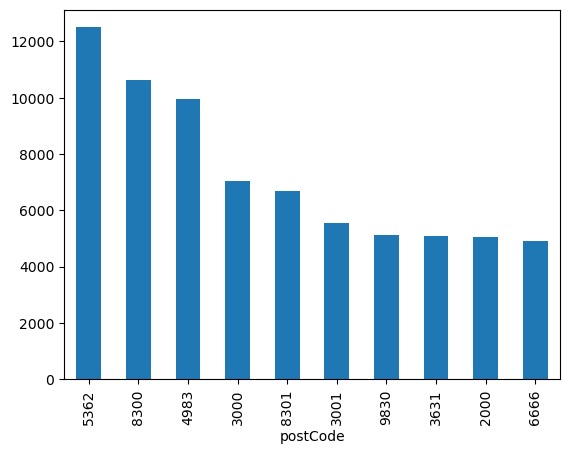

In [3]:
#price per postcode / habitable surface
import pandas as pd
df = pd.read_csv("ml_ready_real_estate_data.csv")


df['price_per_sqm'] = df['price'] / df['habitableSurface']
df.groupby('postCode')['price_per_sqm'].mean().sort_values(ascending=False).head(10).plot(kind='bar')

<Axes: >

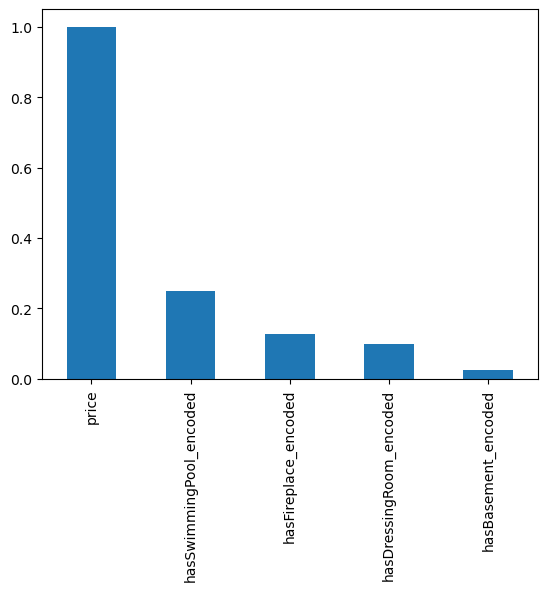

In [4]:
#how much add each "has" to price
feature_cols = ['hasSwimmingPool_encoded', 'hasFireplace_encoded', 'hasBasement_encoded', 'hasDressingRoom_encoded']
df[feature_cols + ['price']].corr()['price'].sort_values(ascending=False).plot(kind='bar')

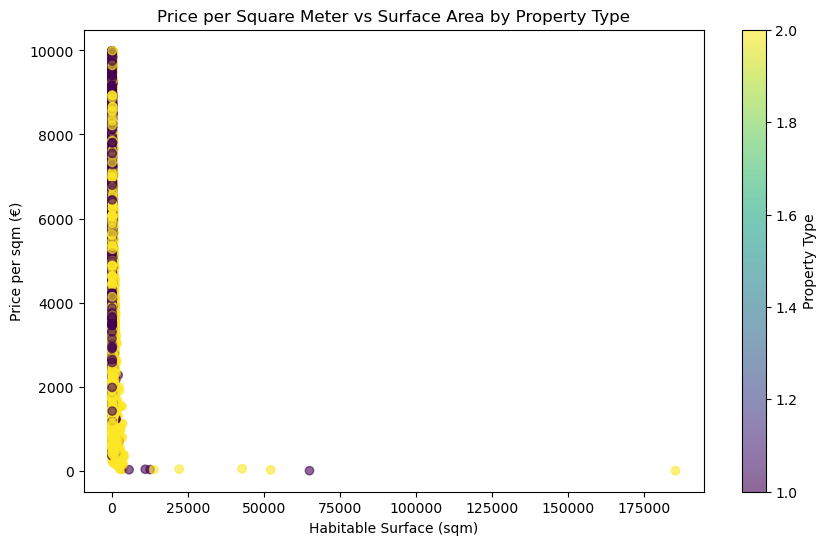

In [7]:

#Price per sqm
filtered_df = df[(df['habitableSurface'] > 0) & (df['price'] > 0)]
filtered_df['price_per_sqm'] = filtered_df['price'] / filtered_df['habitableSurface']
# Remove outliers
filtered_df = filtered_df[filtered_df['price_per_sqm'] < 10000]
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['habitableSurface'], filtered_df['price_per_sqm'], c=filtered_df['type_encoded'], alpha=0.6)
plt.xlabel('Habitable Surface (sqm)')
plt.ylabel('Price per sqm (€)')
plt.title('Price per Square Meter vs Surface Area by Property Type')
plt.colorbar(label='Property Type')

<Axes: xlabel='bedroomCount'>

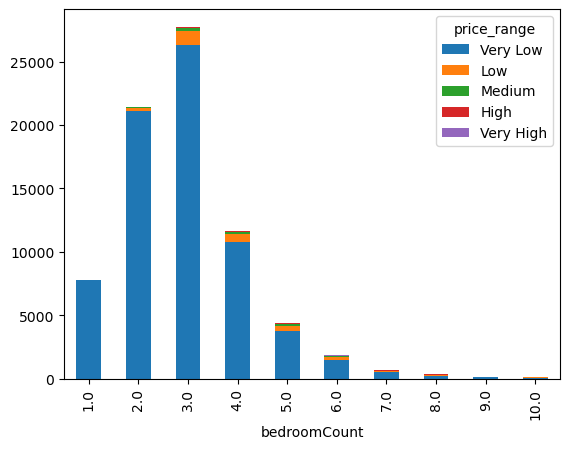

In [8]:
#price by number of bedroom
df['price_range'] = pd.cut(df['price'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
pd.crosstab(df['bedroomCount'], df['price_range']).plot(kind='bar', stacked=True)

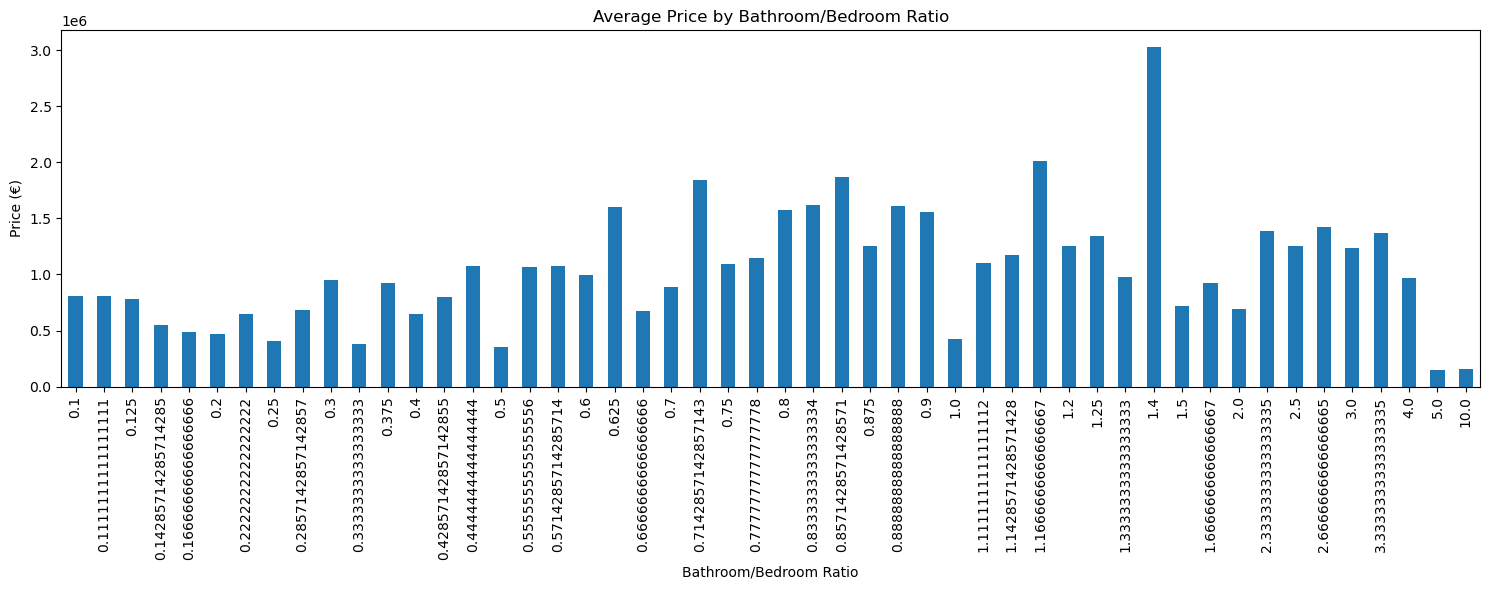

In [13]:
df['bath_bed_ratio'] = df['bathroomCount'] / df['bedroomCount']
plt.figure(figsize=(15, 6))
df.groupby('bath_bed_ratio')['price'].mean().plot(kind='bar')
plt.title('Average Price by Bathroom/Bedroom Ratio')
plt.xlabel('Bathroom/Bedroom Ratio')
plt.ylabel('Price (€)')
plt.xticks(rotation=90)  # Vertical
plt.tight_layout()

Text(0, 0.5, 'Price (€)')

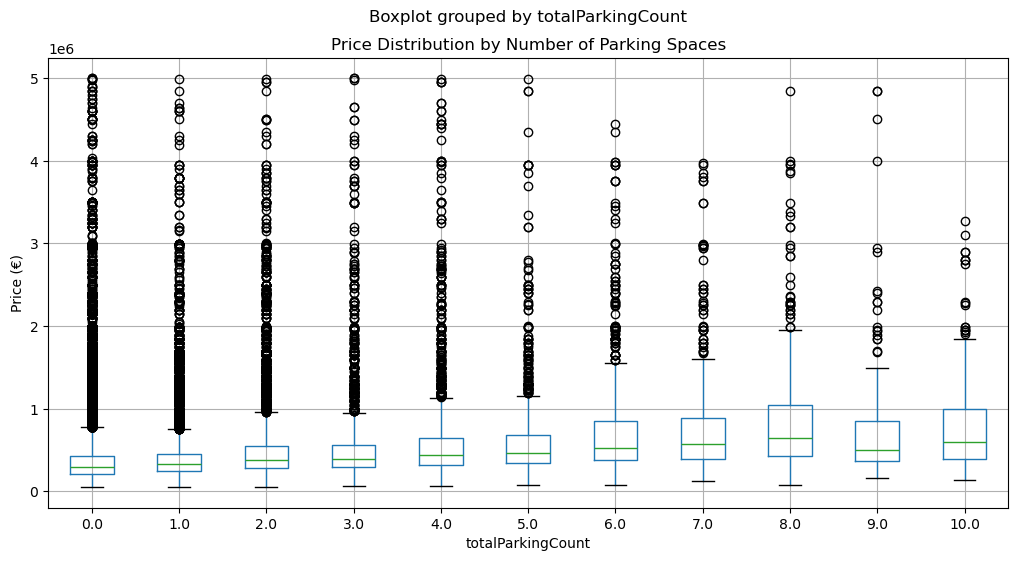

In [14]:
#Price distribution by number of parking space
df.boxplot(column='price', by='totalParkingCount', figsize=(12, 6))
plt.title('Price Distribution by Number of Parking Spaces')
plt.ylabel('Price (€)')

Text(0.5, 1.0, 'Average Price by Luxury Features Count')

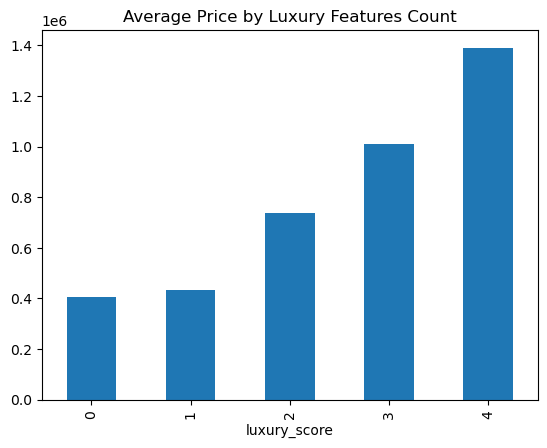

In [15]:
#How much adding all "luxury features" add to the price
df['luxury_score'] = df['hasSwimmingPool_encoded'] + df['hasFireplace_encoded'] + df['hasBasement_encoded'] + df['hasDressingRoom_encoded']
df.groupby('luxury_score')['price'].mean().plot(kind='bar')
plt.title('Average Price by Luxury Features Count')

Text(0.5, 1.0, 'Median Property Prices by Province')

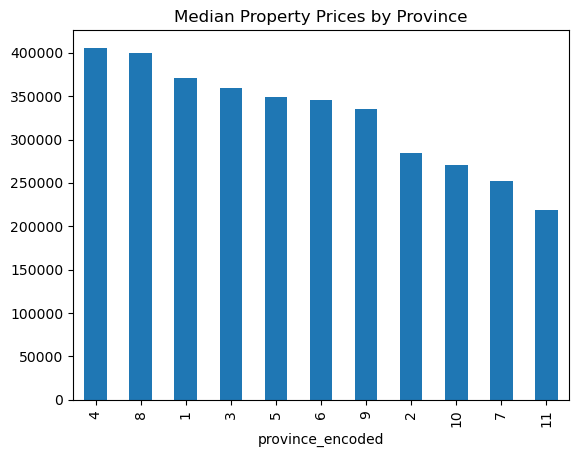

In [16]:
#Number of house by province. ( find the Number of each province in our code)
df.groupby('province_encoded')['price'].median().sort_values(ascending=False).plot(kind='bar')
plt.title('Median Property Prices by Province')

Text(0.5, 1.0, 'Price vs Room Efficiency (rooms per 100 sqm)')

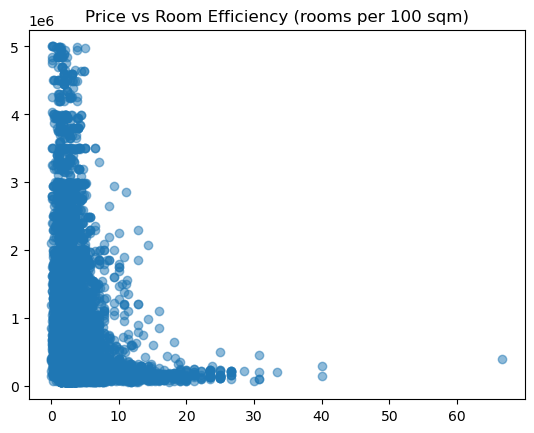

In [17]:
# price vs room efficiency
df['room_efficiency'] = (df['bedroomCount'] + df['bathroomCount']) / df['habitableSurface'] * 100
plt.scatter(df['room_efficiency'], df['price'], alpha=0.5)
plt.title('Price vs Room Efficiency (rooms per 100 sqm)')

Text(0.5, 1.0, 'Price Distribution by Toilet/Bathroom Ratio')

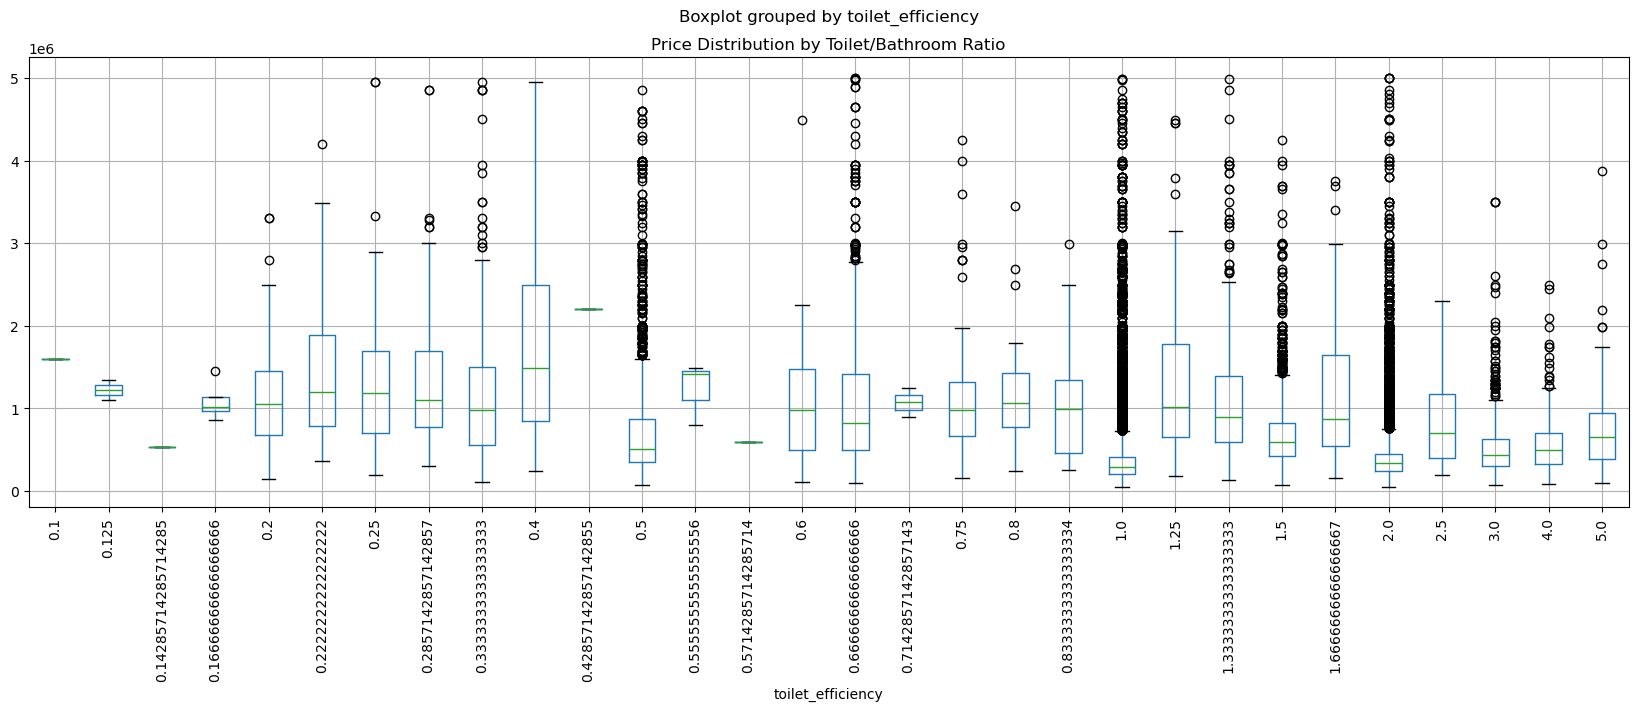

In [20]:
df['toilet_efficiency'] = df['toiletCount'] / df['bathroomCount']
df.boxplot(column='price', by='toilet_efficiency', figsize=(20, 6))
plt.xticks(rotation=90)  # Vertical
plt.title('Price Distribution by Toilet/Bathroom Ratio')

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_16212\1279657619.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['size_category', 'type_encoded'])['price'].mean().unstack().plot(kind='bar', figsize=(12, 6))


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Tiny'),
  Text(1, 0, 'Small'),
  Text(2, 0, 'Medium'),
  Text(3, 0, 'Large'),
  Text(4, 0, 'Mansion')])

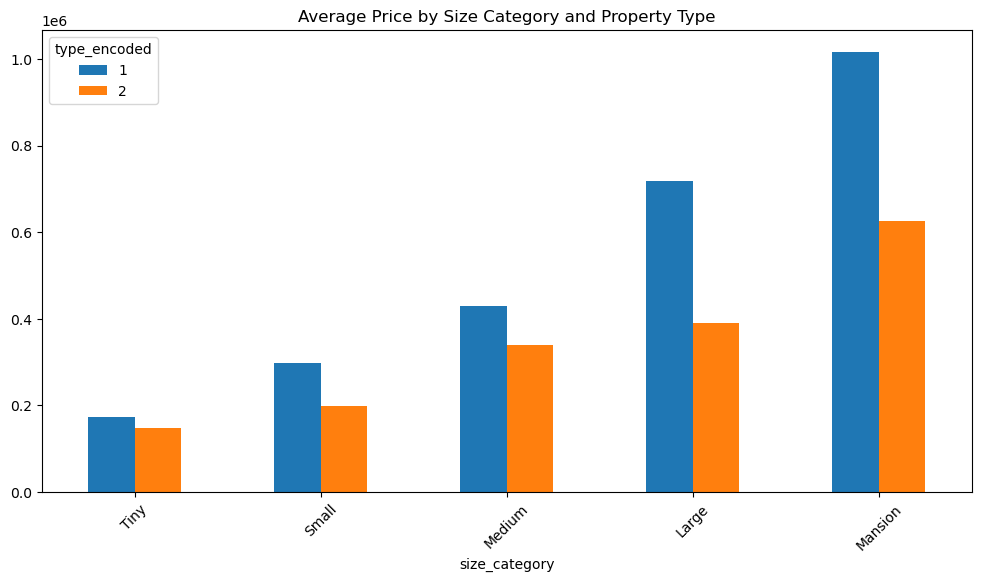

In [21]:
df['size_category'] = pd.cut(df['habitableSurface'], bins=[0, 50, 100, 150, 200, 500], labels=['Tiny', 'Small', 'Medium', 'Large', 'Mansion'])
df.groupby(['size_category', 'type_encoded'])['price'].mean().unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Average Price by Size Category and Property Type')
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '5362'),
  Text(1, 0, '1404'),
  Text(2, 0, '9831'),
  Text(3, 0, '4983'),
  Text(4, 0, '1671'),
  Text(5, 0, '1380'),
  Text(6, 0, '6661'),
  Text(7, 0, '8300'),
  Text(8, 0, '9830'),
  Text(9, 0, '4841'),
  Text(10, 0, '9992'),
  Text(11, 0, '1473'),
  Text(12, 0, '3472'),
  Text(13, 0, '1933'),
  Text(14, 0, '3631'),
  Text(15, 0, '2970'),
  Text(16, 0, '3052'),
  Text(17, 0, '3717'),
  Text(18, 0, '7322'),
  Text(19, 0, '1421')])

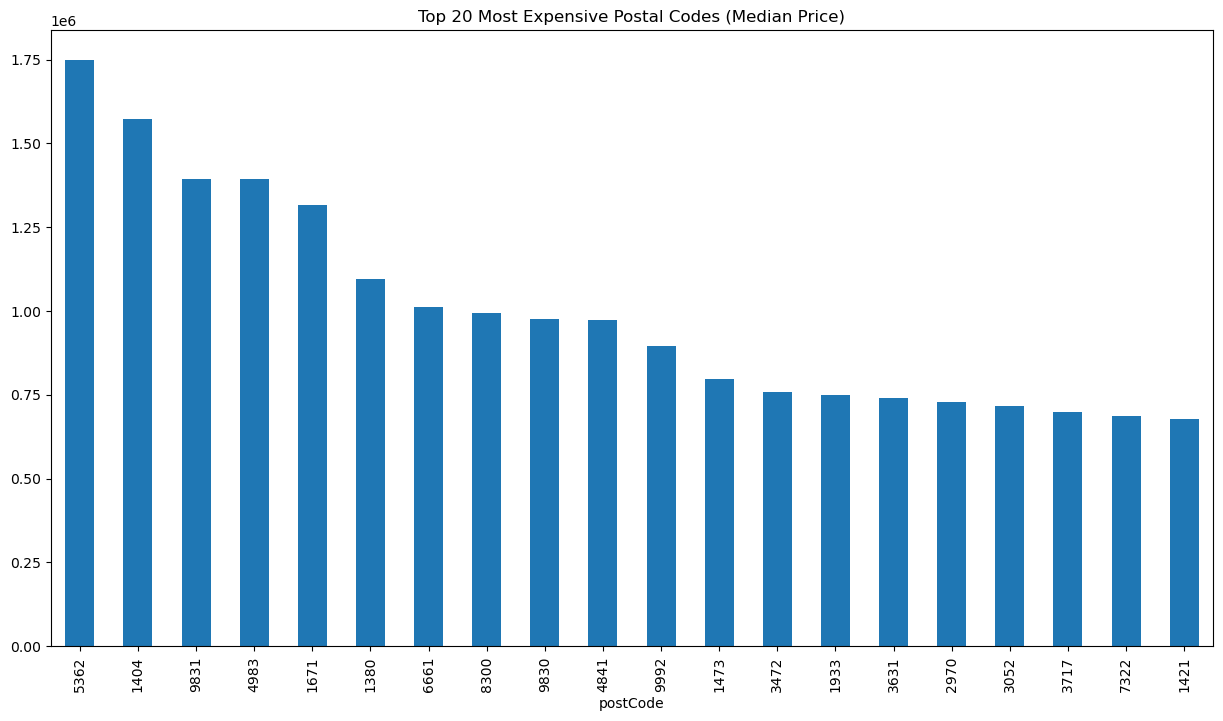

In [22]:
postal_prices = df.groupby('postCode')['price'].median().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
postal_prices.head(20).plot(kind='bar')
plt.title('Top 20 Most Expensive Postal Codes (Median Price)')
plt.xticks(rotation=90)

In [24]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < Q1 - 1.5*IQR) | (df['price'] > Q3 + 1.5*IQR)]
print(f"Found {len(outliers)} outliers out of {len(df)} properties")
outliers[['habitableSurface', 'price', 'bedroomCount', 'postCode']].head(10)

Found 5897 outliers out of 76103 properties


,habitableSurface,price,bedroomCount,postCode
1,270.0,895000.0,4.0,1040
6,220.0,950000.0,3.0,1040
7,220.0,950000.0,3.0,1040
15,198.0,995000.0,3.0,1040
16,375.0,1095000.0,4.0,1040
17,335.0,1450000.0,4.0,1040
19,220.0,950000.0,3.0,1040
23,198.0,995000.0,3.0,1040
24,198.0,995000.0,3.0,1040
28,330.0,1090000.0,6.0,1040


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io

# Step 1: Download Belgian postal code coordinates
def download_belgian_postal_codes():
    try:
        # Direct download from GeoNames
        url = "https://download.geonames.org/export/zip/BE.zip"
        response = requests.get(url)
        
        if response.status_code == 200:
            # Read the zip file content
            import zipfile
            with zipfile.ZipFile(io.BytesIO(response.content)) as z:
                with z.open('BE.txt') as f:
                    # GeoNames format: country code, postal code, place name, admin name1, admin code1, admin name2, admin code2, admin name3, admin code3, latitude, longitude, accuracy
                    postal_coords = pd.read_csv(f, sep='\t', header=None, 
                                              names=['country_code', 'postal_code', 'place_name', 
                                                   'admin_name1', 'admin_code1', 'admin_name2', 'admin_code2',
                                                   'admin_name3', 'admin_code3', 'latitude', 'longitude', 'accuracy'])
                    return postal_coords[['postal_code', 'place_name', 'latitude', 'longitude']]
        else:
            print("Could not download data automatically. Please download manually.")
            return None
    except Exception as e:
        print(f"Error downloading data: {e}")
        return None



# Step 2: Create the heatmap
def create_belgian_price_heatmap(df):

        # Download postal code coordinates
    print("Downloading Belgian postal code coordinates...")
    postal_coords = download_belgian_postal_codes()
    
    if postal_coords is None:
        raise Exception("Could not download postal code data. Please check your internet connection or download manually from https://download.geonames.org/export/zip/BE.zip")
    
    # Calculate price statistics by postal code
    postal_prices = df.groupby('postCode').agg({
        'price': ['median', 'mean', 'count']
    }).round(0)
    
    # Flatten column names
    postal_prices.columns = ['median_price', 'mean_price', 'property_count']
    postal_prices = postal_prices.reset_index()
    
    # Merge with coordinates
    postal_coords['postCode'] = postal_coords['postal_code']  # Match column names
    map_data = postal_prices.merge(postal_coords, on='postCode', how='inner')
    
    # Remove outliers for better visualization
    Q1 = map_data['median_price'].quantile(0.25)
    Q3 = map_data['median_price'].quantile(0.75)
    IQR = Q3 - Q1
    map_data = map_data[
        (map_data['median_price'] >= Q1 - 1.5 * IQR) & 
        (map_data['median_price'] <= Q3 + 1.5 * IQR)
    ]
    
    # Create the interactive heatmap
    fig = px.scatter_mapbox(
        map_data,
        lat="latitude",
        lon="longitude",
        color="median_price",
        size="property_count",
        hover_name="place_name",
        hover_data={
            "postCode": True,
            "median_price": ":€,.0f",
            "mean_price": ":€,.0f", 
            "property_count": True,
            "latitude": False,
            "longitude": False
        },
        color_continuous_scale="inferno",  # Plasma for better visibility
        size_max=20,  
        zoom=7,
        center={"lat": 50.8503, "lon": 4.3517},  # Center on Brussels
        mapbox_style="carto-positron",  # Changed from open-street-map to light background
        title=" Belgian Real Estate Prices by Postal Code<br><sub>Size = Number of Properties, Color = Median Price</sub>",
        labels={"median_price": "Median Price (€)", "property_count": "Properties"}
    )
    
    # Customize the layout
    fig.update_layout(
        height=700,
        font=dict(size=12),
        title_font_size=16,
        coloraxis_colorbar=dict(
            title="Median Price (€)",
            title_font_size=14,
            tickformat="€,.0f"
        )
    )
    
    return fig

# Step 3: Usage example
if __name__ == "__main__":
   
    fig = create_belgian_price_heatmap(df)
    fig.show()
    
    fig.write_html("belgian_real_estate_heatmap.html")
    
   